In [1]:
#goruntu histogrami , dijital goruntudeki ton dagiliminin grafiksel bir temsili olarak islev goren bir histogram turudur.
#her bir ton degeri icin piksel sayisini icerir.
#blirli bir goruntu icin histograma bakilarak, ton dagilimi anlasilabilir.
#bizim gorsellerimizdeki renk dagilimlari sayiyla gosteririliyordu, 0 - 255 arasinda olacak sekilde.
#bu grafik ise her bir sayinin gorselde kac adet oldugunu gosteren yardimci bir grafiktir.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x20729b2d5d0>)

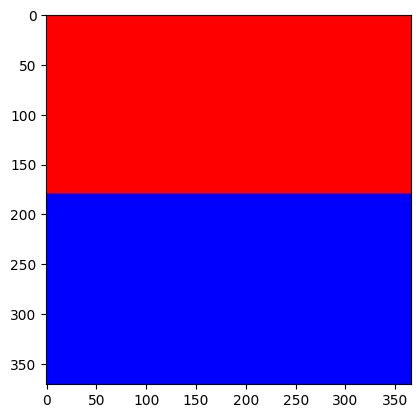

In [3]:
#resmi ice aktariyoruz.
img = cv2.imread("red_blue.jpg")
img_vis = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(), plt.imshow(img_vis)

In [4]:
#resmimizde kac tane piksel var ona bakalim
print(img_vis.shape)

(371, 366, 3)


(256, 1)


(<Figure size 640x480 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x2072a98df90>])

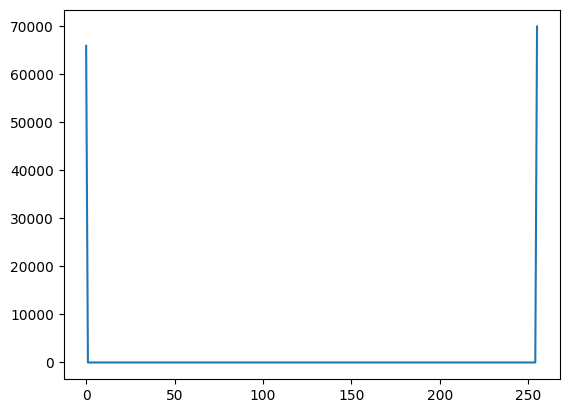

In [5]:
#histogramimizi cizelim
img_hist = cv2.calcHist([img], channels = [0], mask = None, histSize = [256], ranges = [0,256])  
#mask resmin belli bir bolgesini almak demek. hist size imiz 0 dahil olucak sekilde 256 oluyor. ranges 0 dan 256(dahil degil).
#channels ise bizim rgb mi yoksa gri mi tek duzey bir resim mi oldugunu belirtiyoruz. biz 0 girdik yani gri tek duzey olucak:
#yani shape imizdeki (371, 366, 3) sondaki 3 artik olmayacak
print(img_hist.shape)
plt.figure(), plt.plot(img_hist)

In [6]:
#256 ya 1 olarak cikti, belirledigimiz araliklarda ciktilar.
#simdi burada bi 0 da peak var bir de 256 da peak var bunlari biliyoruz cunku remimiz kirmizi ve maviden olusuyor yani:
# R G B olarak bakarsak ilk degerler Kirmiziyi yani R yi sondaki degeerleri Maviyi yani B yi ifade ediyor.
#simdi ama bu grafikte renk ayrimi yok simdi renk ayrimi ile grafik yapicaz ve yorumlayacagiz.

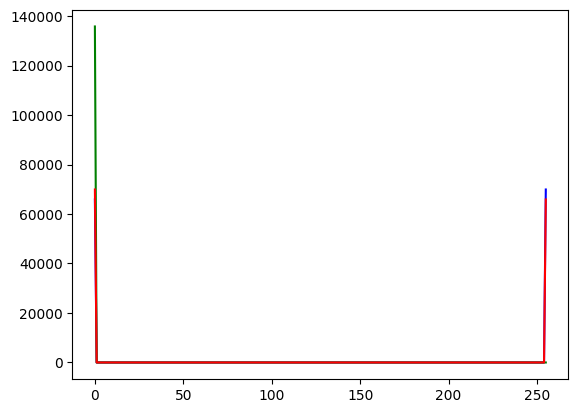

In [7]:
color = ("b", "g", "r")   #color degiskenini atiyoruz.
plt.figure()
for i , c in enumerate(color):
#burada yaptigimiz sey: coloru aliyor colorun icinde donuyor ama cikti olarak hem b nin indeksini i y esitliyor hem de string
#oalrak b yi c ye esitliyor yani: colorun indexini ve degiskeninin icinde bulunan elemani return ediyor.    
    hist = cv2.calcHist([img], channels = [i], mask = None, histSize = [256], ranges = [0,256])
    #burada artik channels imiz i oluyor cunku 3 renk arasinda donucek, b g ve r arasinda.
    plt.plot(hist, color = c)  #burada ise color ile renk atiyoruz renkler ise c den geliyor c de bize b g ve r yi donduruyor.

In [8]:
#simdi burada sol tarafta renkler ile 0 in ustunde olan cubuklardan yorumlama yapiyoruz. yani:
# sol tarafta yesil cubugumuz en fazla olan neden? cunku resmimizde hic yesil yok yani yesil cubugumuz resmimizin tum pixel
#sayisi ile esit seviyede ve 0 a esit. mesela 100 pikselde 0 tane yesil var o zaman yesil en uzun cubuk oluyor.
#o tarafta resimin butununde ne kadar kirmizi yoksa o kadar uzun bir kirmizi cizgi ve ona cok yakin esit olarak da
#mavi cizgimiz var cunku resmin yarisinda mavi yarisinda kirmizi var o yuzden diger bolgelerde kirmizi ve mavi yok.
#sag tarafta ise mavi ve kirmizi renklerimizden kac tane pixsel oldugunu gosteren yukari dogru cizgimiz var.
#yorumlama bu sekilde oluyor.

In [10]:
#simdi farkli resimler uzerinde dagilimlari inceleyelim.
#simdi bunlarda maskeleme islemini yapicaz, resmin kucuk bir bolumunu alicaz.

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x2072ab55d50>)

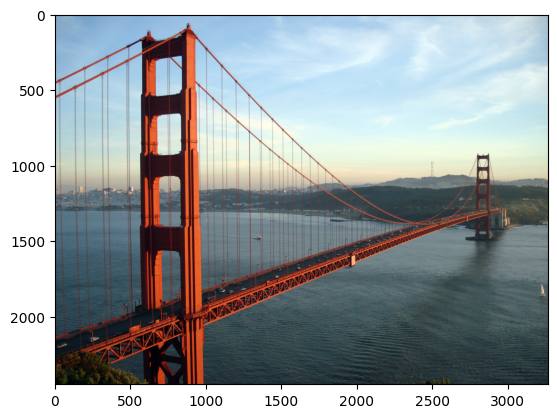

In [11]:
golden_gate = cv2.imread("goldenGate.jpg")
golden_gate_vis = cv2.cvtColor(golden_gate, cv2.COLOR_BGR2RGB)
plt.figure(), plt.imshow(golden_gate_vis)

In [13]:
print(golden_gate.shape)
#cok buyuk bir foto.

(2448, 3264, 3)


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x2072c403150>)

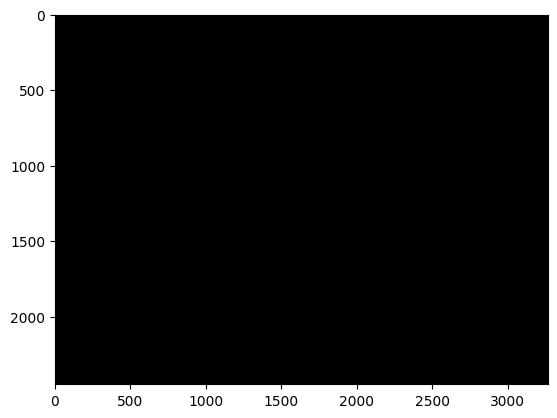

In [14]:
#simdi bir maske olusturucaz
mask = np.zeros(golden_gate.shape[:2], np.uint8)
plt.figure(), plt.imshow(mask, cmap="gray")
#simdi burada ne yaptik. simdiyah bir ekran yaptik. peki bununla nasil maske olusturucaz.
#bu simsiyah maskemizin ustunde bir delik acicaz ve bu maskeyi resme uygulayacagiz. deligi actigimiz yerde resim gozukecek
#diger yerler siyah olacak, bu sayede sadece deligi actigimiz yerden renk verilerini cekicez.

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x20730a88b90>)

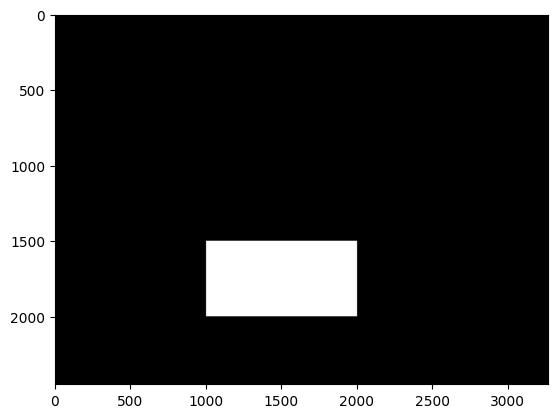

In [16]:
#simdi maskemizi ayarlayalim
mask[1500:2000, 1000:2000] = 255   #255 dedigimizde ne oldu beyaz oldu.
plt.figure(), plt.imshow(mask, cmap="gray")

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x20730a7b150>)

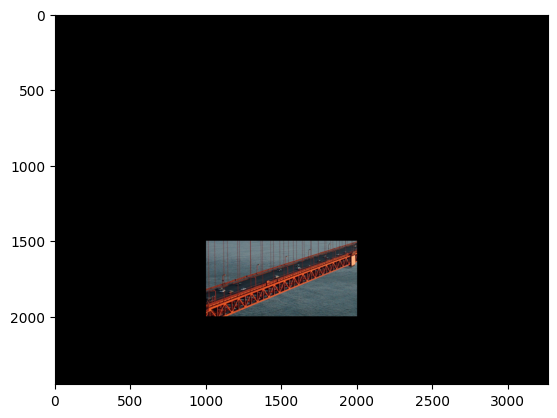

In [17]:
#maskemizi resme gecirelim
masked_img_vis =cv2.bitwise_and(golden_gate_vis, golden_gate_vis, mask = mask)
plt.figure(), plt.imshow(masked_img_vis, cmap="gray")

(<Figure size 640x480 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x20730b87950>])

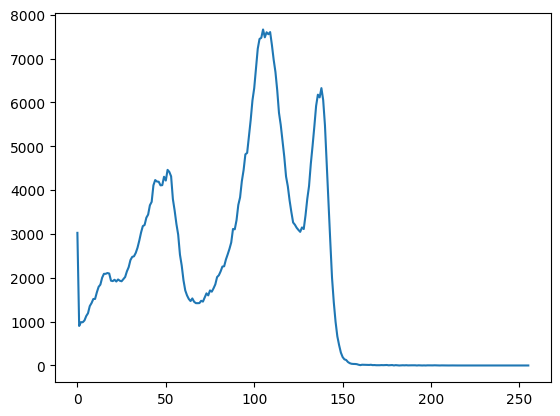

In [19]:
#histogramimizi cikartalim
masked_img =cv2.bitwise_and(golden_gate, golden_gate, mask = mask)
masked_img_hist = cv2.calcHist([golden_gate], channels = [0], mask = mask, histSize = [256], ranges = [0,256])
#buradaki channels = 0 kirmiziya karsilik geliyor cunku resmimizi rgb ye cevirmistik R ile kirmiziydi.
plt.figure(), plt.plot(masked_img_hist)

In [20]:
#bunu yorumlamaya gelirsek mesela bruada kirmizi icin iste yaklasik 100 degeri icin yaklasik 8000 tane piksel varmis.
#buradaki channels in icine 1 ve 2 yazarsak 1 icin yesil pikselleri 2 icin ise mavi piksellerin dagilimini goruruz

In [21]:
#Simdi ise sirada histogram esitleme islemimiz var
#yani karsitlilik artirma. aslinda burada renkleri ic ice gecmis fotografta kontrasti artirip renklerin detaylarini
#belirgin hale getirmeye calisicaz

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x20730f5ae10>)

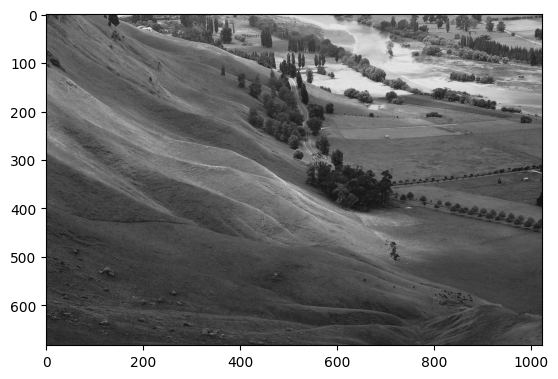

In [22]:
#resmi yukleyelim
img = cv2.imread("hist_equ.jpg", 0)
plt.figure(), plt.imshow(img, cmap="gray")

(<Figure size 640x480 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x2072aa4df10>])

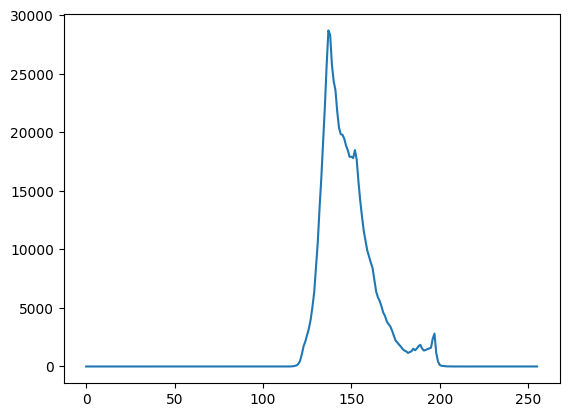

In [23]:
#simdi histogramlarini cikartircaz
img_hist = cv2.calcHist([img], channels = [0], mask = None, histSize = [256], ranges = [0,256])
#channel burada 0 olmak zorunda cunku rgb de degil gray scale de takiliyoruz o yuzden baskasi yok yani.
plt.figure(), plt.plot(img_hist)

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x2073102a610>)

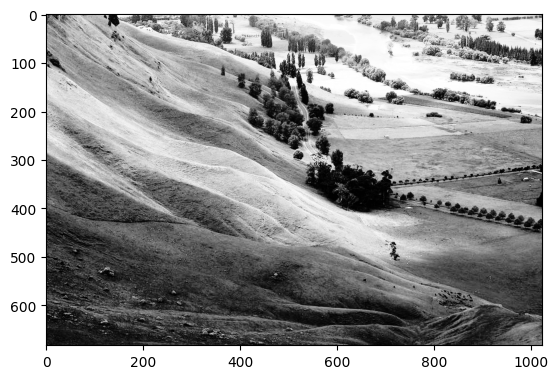

In [25]:
#simdi esitleme islemine gelelim, yani kontrastini artirma islemini yapalim.
eq_hist = cv2.equalizeHist(img)
plt.figure(), plt.imshow(eq_hist, cmap="gray")

In [26]:
#bruada yaptigmiz sey ise beyaz yerleri daha da beyazlastirarak 0 255 range ini daha da actik.
#255 e daha yakin olan yerleri 255 e daha da yaklastirarak beyazlastirdik, diger yerleri de 0 a yaklastirarak kararttik.

(<Figure size 640x480 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x2072aa1d710>])

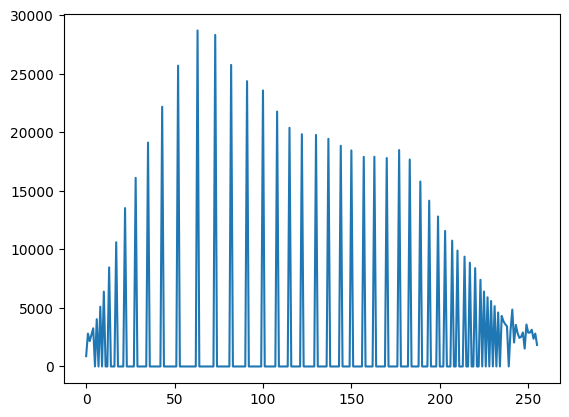

In [27]:
#bide bunun histogramini yapalim
eq_img_hist = cv2.calcHist([eq_hist], channels = [0], mask = None, histSize = [256], ranges = [0,256])
plt.figure(), plt.plot(eq_img_hist)

In [28]:
#ustte gorursunuz 120 ile 210 arasina sikismis yerleri 0 ile 250 arasina yayarak kontrast artirip daha yorumlanabilir gorsel
#elde ettik.